In [1]:
# Skewness
# skewness: a measure of asymmetry around the mean, it is 0 for an ND
# skewness = 0 means that values at the edges of the distribution are equally likely

# Positive Skeewnes:
# A right-skewed distribution shows many outliers with values larger than the mean.
# These outliers greatly affect the mean value as they shift it considerably to the right of the median value.
# An example is the distribution of incomes. 
# Income is floored at ZERO on the left as there cannot be negative values of income. 
# However, there is no upper limit to the possible values of incomes, thus this specific distribution will be right-skewed

# Negative Skeewnes:
# A left-skewed distribution shows many outliers with values smaller than the mean.
# These outliers greatly affect the mean value as they shift it considerably to the left of the median value.
# An example is the distribution of losses caused by storms. 
# The large majority of storms cause little or no losses.
# Occasionally a large storm may cause great losses.
# In this example the mean value will shift to the left of the median.
# Losses that are caused by storms have an upper bound of zero and no lower bound.

In [2]:
# Kurtosis
# Kurtosis is a measure of the frequency of outliers.
# ND have a kurtosis of 3.
# Excess kurtosis = kurtosis - 3
# A distribution with Kurtosis larger than 3 is a distribution in which outliers are more likely than the outliers of a ND

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')

In [4]:
sp_data = pd.read_csv('datasets/SP_500_1987.csv')
sp_data.head()

,Date,Open,High,Low,Close,AdjClose,Volume
0,31-Dec-1986,243.37,244.03,241.28,242.17,242.17,"13,92,00,000"
1,2-Jan-1987,242.17,246.45,242.17,246.45,246.45,"9,18,80,000"
2,5-Jan-1987,246.45,252.57,246.45,252.19,252.19,"18,19,00,000"
3,6-Jan-1987,252.20,253.99,252.14,252.78,252.78,"18,93,00,000"
4,7-Jan-1987,252.78,255.72,252.65,255.33,255.33,"19,09,00,000"


In [5]:
sp_data.describe()

,Open,High,Low,Close,AdjClose
count,253.000000,253.000000,253.000000,253.000000,253.000000
mean,286.964466,289.328063,284.412095,286.978617,286.978617
std,28.923683,28.241142,29.535528,28.889053,28.889053
min,223.980000,225.770000,216.460000,223.920000,223.920000
25%,267.840000,270.400000,264.310000,267.840000,267.840000
50%,290.520000,292.470000,288.340000,290.520000,290.520000
75%,308.940000,310.270000,307.420000,308.960000,308.960000
max,336.770000,337.890000,334.460000,336.770000,336.770000


In [6]:
sp_data.dtypes

Date         object
Open        float64
High        float64
Low         float64
Close       float64
AdjClose    float64
Volume       object
dtype: object

In [7]:
# The DS has the column Date of type Object
# We want to convert all the data in the Date column of the DS to the DateTime type
sp_data['Date']

# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
# https://stackoverflow.com/questions/47556976/representing-date-format-for-three-letter-month-in-python
# sp_data['Date'] = pd.to_datetime(sp_data['Date'], format='%d-%m-%Y')
sp_data['Date'] = pd.to_datetime(sp_data['Date'], format='%d-%b-%Y')

# The data file had to be edited as there were dates such as 01-Dec-1990 mixed with dates as 01-April-1990
# All the entries with a format different from format='%d-%b-%Y' were corrected.

In [8]:
sp_data['Date']

0     1986-12-31
1     1987-01-02
2     1987-01-05
3     1987-01-06
4     1987-01-07
         ...    
248   1987-12-23
249   1987-12-24
250   1987-12-28
251   1987-12-29
252   1987-12-30
Name: Date, Length: 253, dtype: datetime64[ns]

In [9]:
sp_data.dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
AdjClose           float64
Volume              object
dtype: object

C:\Users\pb00270\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pb00270\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'S&P 500 1987')

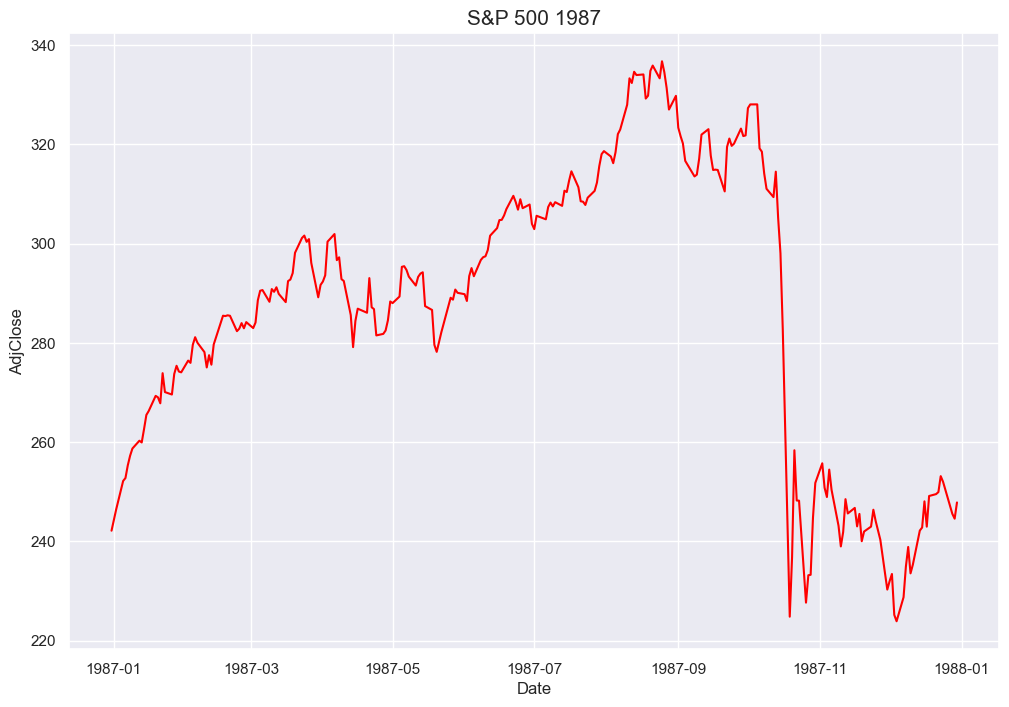

In [10]:
plt.figure(figsize=(12,8))
sns.lineplot(data=sp_data, x='Date', y='AdjClose', color='red')
plt.title('S&P 500 1987', fontsize='15')

In [11]:
# add a computed column to the DS as the % of change of the AdjClose data column
sp_data['Returns'] = sp_data['AdjClose'].pct_change()
sp_data.head()

,Date,Open,High,Low,Close,AdjClose,Volume,Returns
0,1986-12-31,243.37,244.03,241.28,242.17,242.17,"13,92,00,000",NaN
1,1987-01-02,242.17,246.45,242.17,246.45,246.45,"9,18,80,000",0.017674
2,1987-01-05,246.45,252.57,246.45,252.19,252.19,"18,19,00,000",0.023291
3,1987-01-06,252.20,253.99,252.14,252.78,252.78,"18,93,00,000",0.002340
4,1987-01-07,252.78,255.72,252.65,255.33,255.33,"19,09,00,000",0.010088


In [12]:
# remove the data with null or NaN values in any of the columns
sp_data = sp_data.dropna()

In [13]:
sp_data.head()

,Date,Open,High,Low,Close,AdjClose,Volume,Returns
1,1987-01-02,242.17,246.45,242.17,246.45,246.45,"9,18,80,000",0.017674
2,1987-01-05,246.45,252.57,246.45,252.19,252.19,"18,19,00,000",0.023291
3,1987-01-06,252.20,253.99,252.14,252.78,252.78,"18,93,00,000",0.002340
4,1987-01-07,252.78,255.72,252.65,255.33,255.33,"19,09,00,000",0.010088
5,1987-01-08,255.36,257.28,254.97,257.28,257.28,"19,45,00,000",0.007637


In [14]:
sp_data.shape

(252, 8)

C:\Users\pb00270\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'S&P 500 1987')

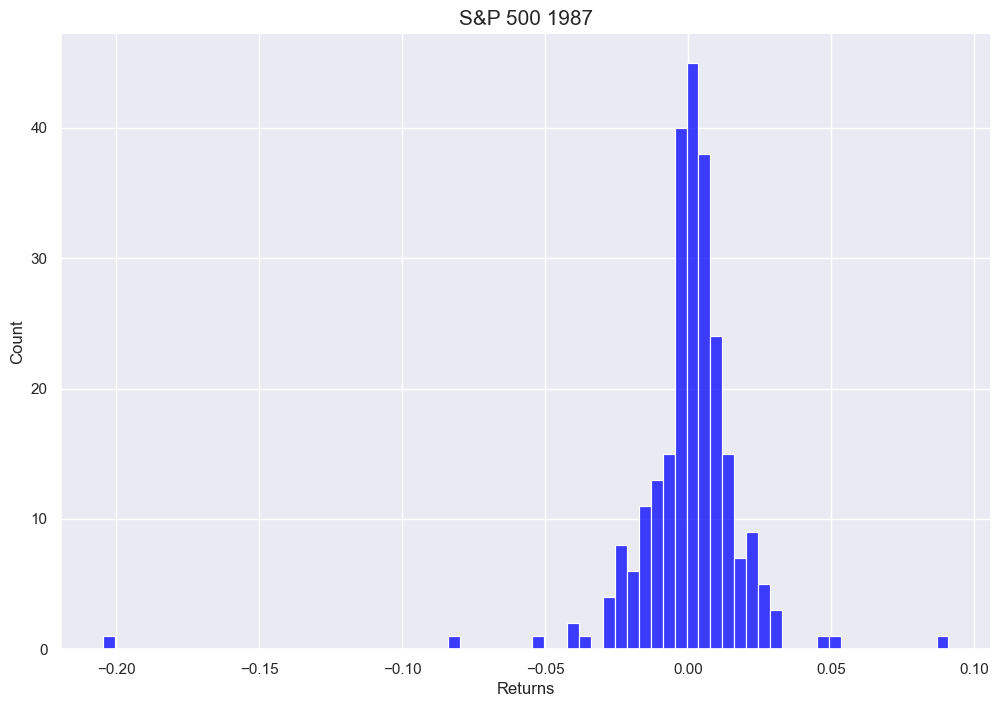

In [15]:
plt.figure(figsize=(12,8))
sns.histplot(data=sp_data, x='Returns', color='blue')
plt.title('S&P 500 1987', fontsize='15')

C:\Users\pb00270\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'S&P 500 1987')

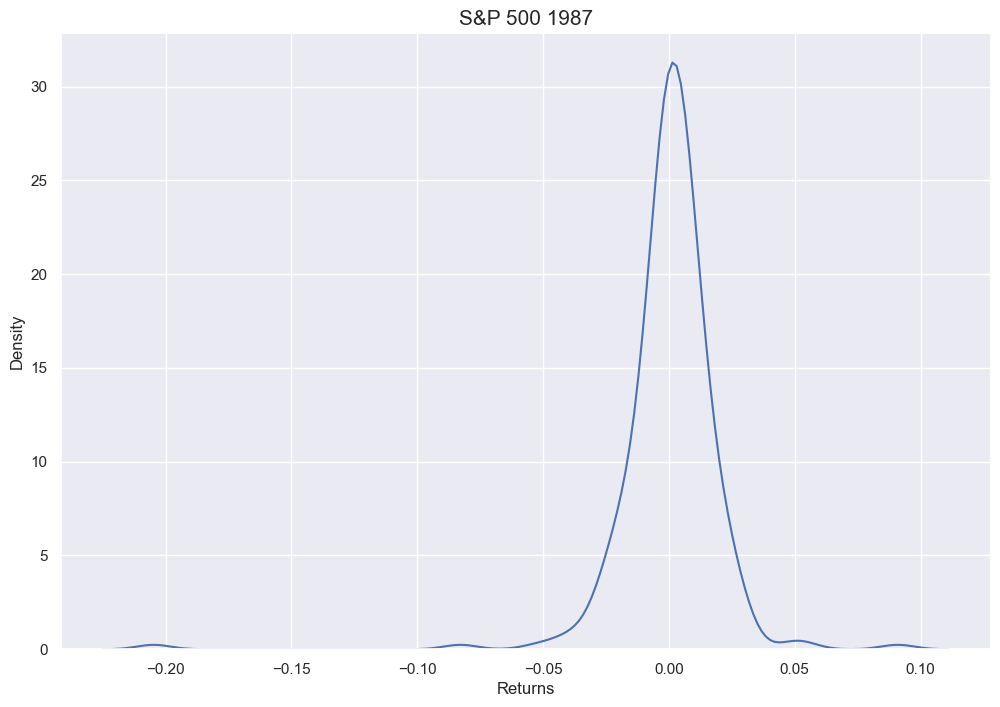

In [16]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=sp_data, x='Returns')
plt.title('S&P 500 1987', fontsize='15')

In [17]:
sp_data['Returns'].skew(axis=0)

-4.063006900553241

In [18]:
# compute the skew for the column Retunrs of the DS using statsmodels.api.stattools
# instead of Pandas
# It computes four values of skeewnes 
# 1 Standard Skewness Estimator (SSE)
# 2 Quatile Based Skewness Estimator (QSE)
# 3 Mean-Median SE (MMSE-AD) standardised by absolute deviation
# 3 Mean-Median SE (MMSE-SD) standardised by std deviation
sm.stats.stattools.robust_skewness(sp_data['Returns'])

(-4.038782236530137,
 0.033689707286255054,
 -0.11690104948849872,
 -0.06460582304845877)

In [20]:
# mormally distributed data has a kurtosis of 3, any value larger than 3 is excess kurtosis
# kurtosis is a measure of the likelihood of extreme values in a distribution
sp_data['Returns'].kurtosis(axis=0)

43.302749862695954

In [22]:
# there is also a ROBUST measure of kurtosis 
sm.stats.stattools.robust_kurtosis(sp_data['Returns'])

(42.42461267897301, 0.5260629102317422, 1.1767790081095497, 1.350873758059222)

In [24]:
# a new dataset that is created from the original dataset by removing the date on the day of the market crash
sp_data_without_19871019 = sp_data[sp_data['Date'] != '1987-10-19']
sp_data_without_19871019.shape

(251, 8)

In [25]:
sp_data.shape

(252, 8)

In [27]:
# by removing the data on the date of the market crash the skewness of the distribution is much reduced
sm.stats.stattools.robust_skewness(sp_data_without_19871019['Returns'])

(0.017513164647138143,
 0.04202122301747493,
 -0.04955418277064157,
 -0.03306593887076004)

In [28]:
sm.stats.stattools.robust_kurtosis(sp_data_without_19871019['Returns'])

(7.587148622145325, 0.5143641446322276, 0.7746063448479199, 1.299285954181316)